## Kapitza pendulum

For programming we measure time in units of $\omega_0$ (i.e. $\omega_0 t \leftarrow t$) the equation of motion than becomes
\begin{equation}
\ddot \theta = -\sin \theta (1+\lambda \frac{\Omega}{\omega_0^2} \cos \frac{\Omega}{\omega_0} t)
\end{equation}

Text(0, 0.5, '$\\dot\\Theta$')

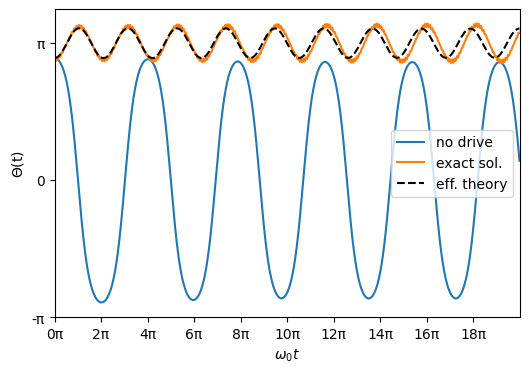

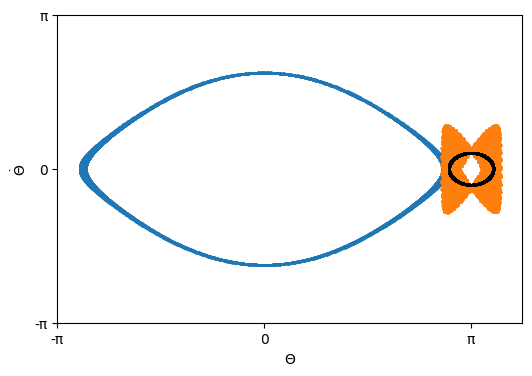

In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from scipy.integrate import solve_ivp

# paramters of the pendulum and strength of drive
w0 = 1.         # bare frequency of pendulum w_0**2 = g/l
Om = 20        # drive frequency
la = 2        # strength of the drive la = a Om / l

# simulated time span
t_max = 10*2*np.pi
t_eval = np.arange(0, t_max, 0.01)

# initial condition for angle theta and the angular velocity
th_in = 2.8
th_vel_in = 0.0

# pendulum without drive 
def ode_sys_static(t, X):
    th = X[0]
    dth_dt = X[1]
    d2th_dt2 = -np.sin(th)
    return [dth_dt, d2th_dt2]

#!!!!!!!!!!!!!!!!!!!!!!!! this is the only function you need to change!
# driven Kapitza pendulum 
def ode_sys_drive(t, X):
    th = X[0]
    dth_dt = X[1]
    d2th_dt2 = -np.sin(th)*(1 + la * Om/w0**2 * np.cos(Om/w0*t))
    return [dth_dt, d2th_dt2]
#!!!!!!!!!!!!!!!!!!!!!!!!

# effective theory of driven pendulum, derived in exercise 10.4
def ode_sys_eff(t, X):
    th = X[0]
    dth_dt = X[1]
    d2th_dt2 = -(1 + la**2 / 2/w0**2 * np.cos(th)) * np.sin(th)
    return [dth_dt, d2th_dt2]


# solve ODE numerically using Runge Kutter (4,5)
sol_stat = solve_ivp(ode_sys_static, [0, t_max], [th_in, th_vel_in], t_eval=t_eval, method='RK45')

sol_drv = solve_ivp(ode_sys_drive, [0, t_max], [th_in, th_vel_in], t_eval=t_eval, method='RK45')

sol_eff = solve_ivp(ode_sys_eff, [0, t_max], [th_in, th_vel_in], t_eval=t_eval, method='RK45')


# plot the evolution of the angle
plt.figure(1, figsize=(6, 4))
plt.plot(sol_stat.t, sol_stat.y[0],label='no drive')
plt.plot(sol_drv.t, sol_drv.y[0],label='exact sol.')
plt.plot(sol_eff.t, sol_eff.y[0],'k--',label='eff. theory')

plt.xlabel('$\omega_0 t$')
plt.ylabel('$\Theta$(t)')
plt.yticks([-np.pi, 0, np.pi], ['-π', '0', 'π'])
xticks = np.arange(0,t_max,2*np.pi)
plt.xticks(xticks,labels=['{0}π'.format(2*k) for k in range(len(xticks))])
plt.xlim(0,t_max)
plt.legend()

# plot phase space map
plt.figure(2, figsize=(6, 4))
plt.plot(sol_stat.y[0], sol_stat.y[1], '.', markersize = 2)
plt.plot(sol_drv.y[0], sol_drv.y[1], '.', markersize = 2)
plt.plot(sol_eff.y[0], sol_eff.y[1], '.k', markersize = 2)
plt.xticks([-np.pi, 0, np.pi], ['-π', '0', 'π'])
plt.yticks([-np.pi, 0, np.pi], ['-π', '0', 'π'])
plt.xlabel('$\Theta$')
plt.ylabel('$\dot\Theta$')



## A small animation to see something 

(everything here should work by default)

In [2]:
%matplotlib notebook

# a little animation of the pendulum
fig = plt.figure(3, figsize=(4, 4))
ax = fig.add_subplot(aspect='equal')

# obtain the real space coordinates of the driven pendulum
def get_coords_drv(i):
    th = sol_drv.y[0][i]
    time = sol_drv.t[i]
    x0 = 0
    x = np.sin(th)
    y0 = -la/Om * np.cos(Om * time)
    y = -np.cos(th) + y0
    
    return [x0, x], [y0,y]

# plot time in title
plot_title = ax.set_title("t=0")

# draw line
x0, y0 = get_coords_drv(0)
line, = ax.plot(x0, y0, lw=2, c='k')

# The pendulum bob: set zorder so that it is drawn over the pendulum rod.
bob_radius = 0.08
circle = ax.add_patch(plt.Circle([x0[1], y0[1]], bob_radius, fc='r', zorder=3))

# Set the plot limits so that the pendulum has room to swing!
ax.set_xlim(-1.4, 1.4)
ax.set_ylim(-1.4, 1.4)

plt.xlabel('x')
plt.ylabel('y')


# update the picutres 
def animate(i):
    x, y = get_coords_drv(i)
    line.set_data(x, y)
    circle.set_center((x[1], y[1]))
    plot_title.set_text(f"t = {sol_drv.t[i]:.1f}")
    
    return line, circle, plot_title

# call the animator. blit=True means only re-draw the parts that have changed
ani = animation.FuncAnimation(fig, animate, frames=np.arange(1, len(sol_drv.t),1), 
                              interval=5, blit=True, repeat=False)

plt.show()

<IPython.core.display.Javascript object>